# 07-1 통계적으로 추론하기

## 표준 점수 구하기

In [1]:
# z값 구하기 1
import numpy as np

x = [0, 3, 5, 7, 10]

s = np.std(x)
m = np.mean(x)
z = (7 - m) / s
print(z)

0.5872202195147035


In [7]:
# z값 구하기 2
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [8]:
# 누적분포 구하기
stats.norm.cdf(0)

np.float64(0.5)

In [13]:
# 1시그마 값 구하기
stats.norm.cdf(1) - stats.norm.cdf(-1)

np.float64(0.6826894921370859)

In [12]:
# 2시그마 값 구하기
stats.norm.cdf(2) - stats.norm.cdf(-2)

np.float64(0.9544997361036416)

In [14]:
# 3시그마 값 구하기
stats.norm.cdf(3) - stats.norm.cdf(-3)

np.float64(0.9973002039367398)

In [19]:
# 특정비율의 z값 구하기
stats.norm.ppf(0.9)

np.float64(1.2815515655446004)

## 중심극한정리 알아보기

In [20]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 153MB/s]


'ns_book7.csv'

In [21]:
import pandas as pd

data = pd.read_csv('ns_book7.csv', low_memory=False)
data.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


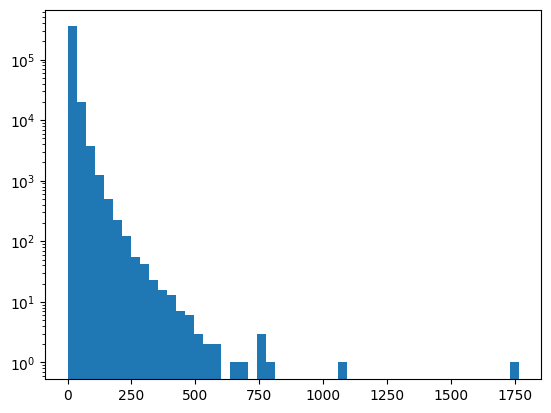

In [22]:
import matplotlib.pyplot as plt

plt.hist(data['대출건수'], bins=50)

plt.yscale('log')

plt.show()

In [29]:
# 대출건수의 데이터에서 무작위로 30개를뽑아 평균을 구하는 과정을 1000번 반복한 값을 빈 리스트에 추가
import numpy as np

np.random.seed(0)

sm= []

for _ in range(1000):
    m=data['대출건수'].sample(30).mean()
    sm.append(m)

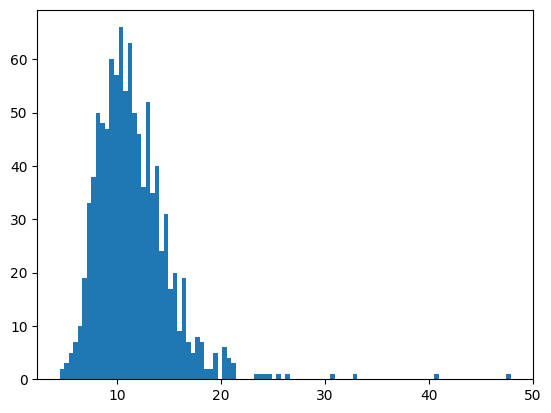

In [32]:
# 평균값의 분포

import matplotlib.pyplot as plt

plt.hist(sm, bins=100)
plt.show()

In [39]:
# 표본의 평균
np.mean(sm)

np.float64(11.516033333333333)

In [41]:
# 모집단의 평균
np.mean(data['대출건수'])

np.float64(11.593438968070707)

In [43]:
# 표본20개 평균
np.random.seed(0)

sm = []

for _ in range(1000):
    m = data['대출건수'].sample(20).mean()
    sm.append(m)

np.mean(sm)

np.float64(11.426150000000002)

In [44]:
# 표본40개 평균
np.random.seed(0)

sm = []

for _ in range(1000):
    m = data['대출건수'].sample(40).mean()
    sm.append(m)

np.mean(sm)

np.float64(11.526725)

In [45]:
# 표본평균의 표준편차
np.std(sm)

np.float64(2.9781179290577127)

In [46]:
# 표본평균의 표준편차 (표준오차)
np.std(data['대출건수']) / np.sqrt(40)

np.float64(3.048338251813498)

## 모집단의 평균 범위 추정하기: 신뢰구간

In [49]:
# 주제분류번호가 00으로 시작하고 도서명에 파이썬이 포함된 데이터 추출

idx=data[data['주제분류번호'].str.startswith('00') & data['도서명'].str.contains('파이썬')]
idx

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165098,180119,Head First Python :머리에 쏙쏙 들어오는 파이썬 안내서,폴 배리 저 ;강권학 역,한빛미디어,2011,9788979148688,NaN,1,NaN,005.133,1,83,2011-12-20
166531,181611,(프로그래머라면 누구나 할 수 있는) 파이썬 해킹 프로그래밍 :해커와 리버스 엔지니...,저스틴 지이츠 지음 ;윤근용 옮김,에이콘출판,2011,9788960771161,9788960771048,1,NaN,005.133,1,24,2011-11-04
178281,194143,Head first programming :파이썬으로 처음 배우는 프로그래밍,폴 배리;데이빗 그리피스 지음 ;강권학 옮김,한빛미디어,2011,9788979148190,NaN,9,NaN,005.11,1,71,2011-04-18
185601,201672,(파이썬과 자바로 함께 배우는) 구글 앱 엔진 시작하기 =Google App eng...,박상엽 지음,인사이트,2010,9788991268715,NaN,1,NaN,005.11,1,14,2010-11-02


In [50]:
# 책 수
len(idx)

251

In [68]:
# 대출건수 평균

m=idx['대출건수'].mean()
m

np.float64(14.749003984063744)

In [62]:
# 표준오차 계산

se=idx['대출건수'].std()/np.sqrt(len(idx))
se

np.float64(0.8057679245434408)

In [59]:
stats.norm.ppf(0.975)

np.float64(1.959963984540054)

In [60]:
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [63]:
# 0.05 신뢰구간 계산

print(m-1.96*se,m+1.96*se)

13.1696988519586 16.32830911616889


## 통계적 의미 확인하기: 가설검정

In [66]:
# 주제분류번호가 00으로 시작하고 도서명에 C++이 포함된 데이터 추출

c_idx=data[data['주제분류번호'].str.startswith('00') & data['도서명'].str.contains('C++', regex=False)]
# regex=False 옵션을 줘서 정규표현식이 아닌 문자 그대로 'C++'를 찾게 함 'C++'는 정규표현식에서 +가 특수기호라 오류 나기 쉬워요 → regex=False 필요!

c_idx

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205998,222790,(공학도를 위한) 최소한의 C++,이창섭;고윤호 공저,문운당,2009,9788973935383,NaN,9,NaN,005.135,1,3,2009-10-28
206348,223163,(예제로 쉽게 풀어쓴) C++ 프로그래밍,강성수 지음,BM성안당,2009,9788931550399,NaN,9,NaN,005.137,1,10,2009-10-14
209463,226361,Visual C++ 게임 제작 고수열강,오정근 지음,구민미디어,2009,9788993393255,NaN,1,NaN,005.137,1,5,2009-08-17
214280,231331,(gcc로 공부하는) C++ programming과 wxWidgets GUI개발 :...,김태용 저,수퍼유저코리아,2009,9788992927123,NaN,1,NaN,005.135,1,17,2009-06-19


In [67]:
# 책 수
len(c_idx)

89

In [70]:
# 대출건수 평균

m2=c_idx['대출건수'].mean()
m2

np.float64(11.595505617977528)

In [71]:
# 표준오차 계산

se2=c_idx['대출건수'].std()/np.sqrt(len(c_idx))
se2

np.float64(0.9803637852662617)

In [72]:
# z값 계산
(m - m2) / np.sqrt(se**2 + se2**2)

np.float64(2.4850154143294114)

In [73]:
stats.norm.cdf(2.50)

np.float64(0.9937903346742238)

In [74]:
# 유의확률

p_value = (1-0.995)*2
p_value

0.010000000000000009

In [76]:
# 가설검정 (독립표본 t 검정)
t, pvalue = stats.ttest_ind(idx['대출건수'], c_idx['대출건수'])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


## 정규분포가 아닐 때 가설 검증하기: 순열검정

In [80]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

In [96]:
# 사용자 지정 함수로 순열검정
def permutation_test(x, y):

    # 표본의 평균 차이를 계산합니다.
    obs_diff = statistic(x, y)

    # 두 표본을 합칩니다.
    all = np.append(x, y)
    diffs = []
    np.random.seed(0)

    # 순열 검정을 1000번 반복합니다.
    for _ in range(1000):

        # 전체 인덱스를 섞습니다.
        idx = np.random.permutation(len(all))

        # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산합니다.
        a = all[idx[:len(x)]]
        b = all[idx[len(x):]]
        diffs.append(statistic(a,b))

    # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
    less_pvalue = np.sum(diffs < obs_diff)/1000
    greater_pvalue = np.sum(diffs > obs_diff)/1000

    # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p-값을 반환합니다. (양측검정)
    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2

(np.float64(3.1534983660862164), np.float64(0.018))

In [82]:
permutation_test(idx['대출건수'], c_idx['대출건수'])

(np.float64(3.1534983660862164), np.float64(0.018))

In [83]:
# 순열검정 함수 사용
res = stats.permutation_test((idx['대출건수'], c_idx['대출건수']), statistic, random_state=0)
print(res.statistic, res.pvalue)

3.1534983660862164 0.025


In [85]:
# 주제분류번호가 00으로 시작하고 도서명에 자바스크립트가 포함된 데이터 추출

jv_idx=data[data['주제분류번호'].str.startswith('00') & data['도서명'].str.contains('자바스크립트')]
jv_idx

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1030,1049,자바스크립트로 하는 자료 구조와 알고리즘 (핵심 자료 구조 및 알고리즘을 이해하고 ...,<b>배세민</b>,에이콘,2019,9791161753447,NaN,NaN,NaN,005.138,1,1,2021-03-09
2521,2627,프레임워크 없는 프론트엔드 개발 (자바스크립트 프레임워크 뜯어보기),프란세스코 스트라츨로,에이콘출판,2021,9791161754895,NaN,NaN,NaN,005.138,1,1,2021-02-08
4989,5330,(ES6로 기초부터 다시 배우는) 자바스크립트 파워북,어포스트 지음,어포스트,2020,9791197122811,NaN,9,NaN,005.133,1,4,2020-10-19
4997,5338,모던 자바스크립트 deep dive :자바스크립트의 기본 개념과 동작 원리,이웅모 지음,위키북스,2020,9791158392239,NaN,9,NaN,005.138,1,4,2020-10-19
14028,14759,(자바스크립트와 함께하는) 블록체인 코딩 :JavaScript와node.js로 분산...,"Eric Traub 지음 ;금창섭,안휘,이재준 옮김",홍릉과학출판사,2020,9791156007043,NaN,9,NaN,005.1,1,4,2020-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167109,182210,(넷브레인 프로젝트를 위한) 임베디드 자바스크립트 언어 =Embedded javas...,전응섭 저,기한재,2011,9788970186412,NaN,9,NaN,005.138,1,0,2011-10-26
191852,208125,HTML & 자바스크립트 활용과 응용 :예제풀이 중심,박현근;김재호;박사준 공저,기한재,2010,9788970186078,NaN,9,NaN,005.138,1,13,2010-07-15
201127,217706,"Comet과 리버스 Ajax :차세데 웹 트렌드, 서버측 자바스크립트",데이브 크레인;필 매카시 지음 ;정지웅 옮김,인사이트,2009,9788991268692,NaN,1,NaN,005.118,1,13,2010-02-22
209472,226370,(스스로 타입을 일깨우는) Web 프로그래밍 =HTML & 자바스크립트,김종훈;김종진;김병수 공저,웅진씽크빅,2009,9788901097978,NaN,1,NaN,005.118,1,14,2009-08-17


In [86]:
print(len(jv_idx), np.mean(jv_idx['대출건수']))

105 15.533333333333333


In [87]:
permutation_test(idx['대출건수'], jv_idx['대출건수'])

(np.float64(-0.7843293492695889), np.float64(0.576))

In [95]:
stats.permutation_test((idx['대출건수'], jv_idx['대출건수']), statistic, random_state=0)

PermutationTestResult(statistic=np.float64(-0.7843293492695889), pvalue=np.float64(0.565), null_distribution=array([ 0.2017454 ,  0.39085563, -0.97343958, ...,  0.33682413,
       -0.54118763,  1.80918232]))